In [30]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np
from math import nan

from CASutils import colormap_utils as mycolors
from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars

import xesmf as xe

importlib.reload(mycolors)
importlib.reload(maps)
importlib.reload(cbars)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [41]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [34]:
landfrac = xr.open_dataset("/project/cas/islas/cesmle/fx/landfraclens.nc")
landfrac = landfrac.LANDFRAC
landfrac = landfrac.where(landfrac > 0.5, nan)
landfrac = landfrac.isel(time=0)

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [3]:
bestpath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_BEST.nc"
best = xr.open_dataset(bestpath)

In [4]:
era5path = "/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_ERA5.nc"
era5 = xr.open_dataset(era5path)

In [5]:
goga1path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA1.nc"
goga1 = xr.open_dataset(goga1path)
goga1varm = goga1.goga1var_djf.mean('Member')

In [6]:
goga2path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA2.nc"
goga2 = xr.open_dataset(goga2path)
goga2varm = goga2.goga2var_djf.mean('Member')

In [7]:
lens1path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS1_djf_var.nc"
lens1 = xr.open_dataset(lens1path)
lens1varm = lens1.djfvar.mean('member')

In [8]:
lens2path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS2_djf_var.nc"
lens2 = xr.open_dataset(lens2path)
lens2varm = lens2.djfvar.mean('member')

In [16]:
wgtfile="/project/cas/islas/temp/wgt.nc"

grid_out = xr.Dataset({'lat': (['lat'], lens2.lat)}, {'lon': (['lon'], lens2.lon)})
regridder = xe.Regridder(best, grid_out, 'bilinear', periodic=True, reuse_weights=False, filename=wgtfile)
bestregrid = regridder(best)

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/xesmf/frontend.py:508: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


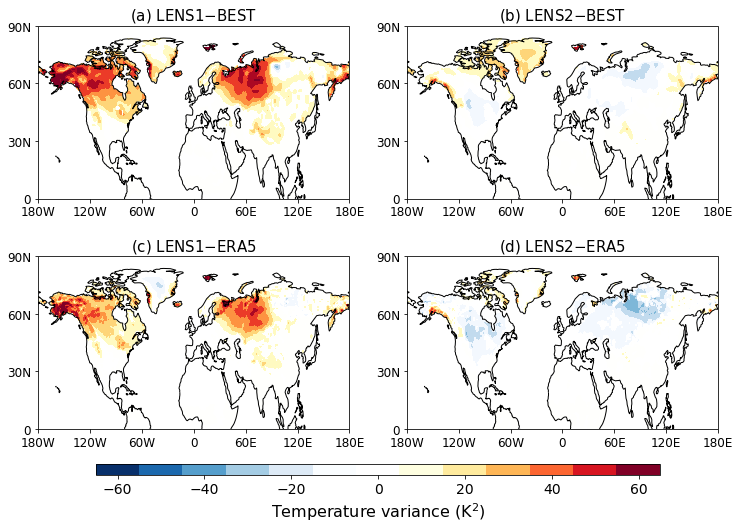

In [42]:
fig = plt.figure(figsize=(16,16))

ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens1varm) - np.array(bestregrid.bestvar), bestregrid.lon, bestregrid.lat,
                                                10,-60,60,'(a) LENS1$-$BEST',0.05,0.32,0.8,0.95)

ax2 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens2varm) - np.array(bestregrid.bestvar), bestregrid.lon, bestregrid.lat,
                                                10,-60,60,'(b) LENS2$-$BEST',0.37,0.64,0.8,0.95)

ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(lens1varm) - np.array(era5.era5var))*landfrac, era5.lon, era5.lat,
                                                10,-60,60,'(c) LENS1$-$ERA5',0.05,0.32,0.6,0.75)

ax4 = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(lens2varm) - np.array(era5.era5var))*landfrac, era5.lon, era5.lat,
                                                10,-60,60,'(d) LENS2$-$ERA5',0.37,0.64,0.6,0.75)


ax = cbars.plotcolorbar(fig, 10, -60, 60,'Temperature variance (K$^{2}$)',
                       0.05+0.05,0.64-0.05,0.56,0.57)

fig.savefig(plotpath+"/figS1.pdf", bbox_inches='tight', facecolor='white')

#fig.savefig(plotpath+"")
#ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens1varm) - np.array(bestregrid), np.array(best.longitude), np.array(best.latitude),
#                                                )

In [18]:
print(bestregrid)

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Data variables:
    bestvar  (lat, lon) float64 6.364 6.364 6.364 6.364 ... nan nan nan nan
Attributes:
    regrid_method:  bilinear


In [12]:
print(best.longitude)

<xarray.DataArray 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
